# Selenium

那些需要浏览器点击后才发送的请求，可以借助selenium来做，但为了驱动Chrome，需要先下载[ChromeDriver](https://sites.google.com/a/chromium.org/chromedriver/downloads)，下载后放到`/usr/local/bin/`文件夹里（[说明在这](https://seleniumhq.github.io/selenium/docs/api/py/webdriver_chrome/selenium.webdriver.chrome.webdriver.html#module-selenium.webdriver.chrome.webdriver)），在初始化就可以不用指定路径去查找，否则需要在实例化`webdriver.Chrome()`时，指定驱动文件的文件路径才可以用。

```python
from selenium import webdriver
# driver = webdriver.Chrome('/Users/xmly/Downloads/chromedriver')
driver = webdriver.Chrome()
driver.get('https://www.taobao.com')
print(driver.page_source)
```

[selenium 官方文档](https://seleniumhq.github.io/selenium/docs/api/py/api.html#webdriver-remote)
>  get()属于 `selenium.webdriver.remote.webdriver`这部分的内容。

[selenium  非官方中文版文档](https://python-selenium-zh.readthedocs.io/zh_CN/latest/)

[selenium 英文版](https://selenium-python.readthedocs.io/)

## 基本使用

https://www.baidu.com/s?ie=utf-8&f=8&rsv_bp=1&rsv_idx=1&tn=baidu&wd=Python&rsv_pq=cd103a7c00009f46&rsv_t=93263lc1R18w812z9UOZzhiys7D2R%2FWxFTAP0Lp37rn1rF6JB5GOaq%2BzIQU&rqlang=cn&rsv_enter=1&rsv_dl=tb&rsv_sug3=6&rsv_sug2=0&inputT=223&rsv_sug4=224
[{'domain': 'www.baidu.com', 'httpOnly': False, 'name': 'BDSVRTM', 'path': '/', 'secure': False, 'value': '103'}, {'domain': '.baidu.com', 'httpOnly': False, 'name': 'PSINO', 'path': '/', 'secure': False, 'value': '3'}, {'domain': '.baidu.com', 'expiry': 3717503438.180369, 'httpOnly': False, 'name': 'BAIDUID', 'path': '/', 'secure': False, 'value': 'A342FDBA2551C819C3D1D6C4E8CDB6F4:FG=1'}, {'domain': '.baidu.com', 'expiry': 3717503438.18053, 'httpOnly': False, 'name': 'PSTM', 'path': '/', 'secure': False, 'value': '1570019793'}, {'domain': '.baidu.com', 'expiry': 3717503438.180496, 'httpOnly': False, 'name': 'BIDUPSID', 'path': '/', 'secure': False, 'value': 'A342FDBA2551C819C3D1D6C4E8CDB6F4'}, {'domain': 'www.baidu.com', 'httpOnly': False, 'n
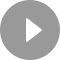
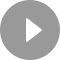
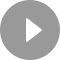
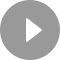
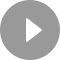
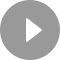
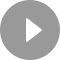
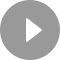

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait

browser = webdriver.Chrome()
try:
    browser.get('https://www.baidu.com')
    input = browser.find_element_by_id('kw')
    input.send_keys('Python')
    input.send_keys(Keys.ENTER)
    wait = WebDriverWait(browser, 10)
    wait.until(EC.presence_of_element_located((By.ID, 'content_left')))
    print(browser.current_url)
    print(browser.get_cookies())
    print(browser.page_source)
finally:
    browser.close()

## 声明浏览器对象

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
browser = webdriver.Firefox()
browser = webdriver.Edge()
browser = webdriver.PhantomJS()
browser = webdriver.Safari()

## 访问页面

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
print(browser.page_source)
browser.close()

## 查找元素

### 单个元素

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input_first = browser.find_element_by_id('q')
input_second = browser.find_element_by_css_selector('#q')
input_third = browser.find_element_by_xpath('//*[@id="q"]')
print(input_first, input_second, input_third)
browser.close()

* find_element_by_name
* find_element_by_xpath
* find_element_by_link_text
* find_element_by_partial_link_text
* find_element_by_tag_name
* find_element_by_class_name
* find_element_by_css_selector

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
# 通用写法find_element，第一个参数传递具体类型，By.xx
input_first = browser.find_element(By.ID, 'q')
print(input_first)
browser.close()

### 多个元素

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
lis = browser.find_elements_by_css_selector('.service-bd li')
print(lis)
browser.close()

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
lis = browser.find_elements(By.CSS_SELECTOR, '.service-bd li')
print(lis)
browser.close()

* find_elements_by_name
* find_elements_by_xpath
* find_elements_by_link_text
* find_elements_by_partial_link_text
* find_elements_by_tag_name
* find_elements_by_class_name
* find_elements_by_css_selector

## 元素交互操作

对获取的元素调用交互方法。
获取元素，然后对元素进行操作。

In [ ]:
from selenium import webdriver
import time

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input = browser.find_element_by_id('q')
# 键入内容
input.send_keys('iPhone')
# 等待1秒钟
time.sleep(1)
# 清除输入框
input.clear()
input.send_keys('iPad')
button = browser.find_element_by_class_name('btn-search')
button.click()

更多操作: http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.remote.webelement

## 交互动作

将动作附加到动作链中串行执行

In [ ]:
from selenium import webdriver
from selenium.webdriver import ActionChains

browser = webdriver.Chrome()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)
# 切换到iframe窗口中
browser.switch_to.frame('iframeResult')
source = browser.find_element_by_css_selector('#draggable')
target = browser.find_element_by_css_selector('#droppable')
actions = ActionChains(browser)
actions.drag_and_drop(source, target)
# 执行perform()，将上诉的动作链式执行
actions.perform()

更多操作: http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.common.action_chains

## 执行JavaScript

这个方式也太万能了吧

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
browser.execute_script('window.scrollTo(0, document.body.scrollHeight)')
browser.execute_script('alert("To Bottom")')

## 获取元素信息

### 获取属性

In [ ]:
from selenium import webdriver
from selenium.webdriver import ActionChains

browser = webdriver.Chrome()
url = 'https://www.zhihu.com/explore'
browser.get(url)
logo = browser.find_element_by_id('zh-top-link-logo')
print(logo)
print(logo.get_attribute('class'))

### 获取文本值

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
url = 'https://www.zhihu.com/explore'
browser.get(url)
input = browser.find_element_by_class_name('zu-top-add-question')
print(input.text)

### 获取ID、位置、标签名、大小

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
url = 'https://www.zhihu.com/explore'
browser.get(url)
input = browser.find_element_by_class_name('zu-top-add-question')
print(input.id)
print(input.location)
print(input.tag_name)
print(input.size)

## Frame

In [ ]:
import time
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

browser = webdriver.Chrome()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)
# 切换到子级iframe
browser.switch_to.frame('iframeResult')
source = browser.find_element_by_css_selector('#draggable')
print(source)
try:
    logo = browser.find_element_by_class_name('logo')
except NoSuchElementException:
    print('NO LOGO')
# 切换到父级iframe
browser.switch_to.parent_frame()
logo = browser.find_element_by_class_name('logo')
print(logo)
print(logo.text)

## 等待

### 隐式等待

当使用了隐式等待执行测试的时候，如果 WebDriver没有在 DOM中找到元素，将继续等待，超出设定时间后则抛出找不到元素的异常, 换句话说，当查找元素或元素并没有立即出现的时候，隐式等待将等待一段时间再查找 DOM，默认的时间是0

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.implicitly_wait(10)
browser.get('https://www.zhihu.com/explore')
input = browser.find_element_by_class_name('zu-top-add-question')
print(input)

### 显式等待

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

browser = webdriver.Chrome()
browser.get('https://www.taobao.com/')
wait = WebDriverWait(browser, 10)
input = wait.until(EC.presence_of_element_located((By.ID, 'q')))
button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '.btn-search')))
print(input, button)

* title_is 标题是某内容
* title_contains  标题包含某内容
* presence_of_element_located 元素加载出，传入定位元组，如(By.ID, 'p')
* visibility_of_element_located  元素可见，传入定位元组
* visibility_of 可见，传入元素对象
* presence_of_all_elements_located 所有元素加载出
* text_to_be_present_in_element 某个元素文本包含某文字
* text_to_be_present_in_element_value  某个元素值包含某文字
* frame_to_be_available_and_switch_to_it  frame加载并切换
* invisibility_of_element_located 元素不可见
* element_to_be_clickable  元素可点击
* staleness_of  判断一个元素是否仍在DOM，可判断页面是否已经刷新
* element_to_be_selected  元素可选择，传元素对象
* element_located_to_be_selected  元素可选择，传入定位元组
* element_selection_state_to_be  传入元素对象以及状态，相等返回True，否则返回False
* element_located_selection_state_to_be  传入定位元组以及状态，相等返回True，否则返回False
* alert_is_present 是否出现Alert

详细内容：http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.support.expected_conditions

## 前进后退

In [ ]:
import time
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com/')
browser.get('https://www.taobao.com/')
browser.get('https://www.python.org/')
browser.back()
time.sleep(1)
browser.forward()
browser.close()

## Cookies

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
print(browser.get_cookies())
browser.add_cookie({'name': 'name', 'domain': 'www.zhihu.com', 'value': 'germey'})
print(browser.get_cookies())
# browser.delete_all_cookies()
# print(browser.get_cookies())

## 选项卡管理

In [1]:
import time
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
browser.execute_script('window.open()')
# 输出选项卡list对象：window_handles
print(browser.window_handles)
browser.switch_to_window(browser.window_handles[1])
browser.get('https://www.taobao.com')
time.sleep(1)
browser.switch_to_window(browser.window_handles[0])
browser.get('https://python.org')

['CDwindow-44CBDC47793BB177151CE29D60104455', 'CDwindow-182E186359C70E74B9FE59430581CB70']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: use driver.switch_to.window instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: use driver.switch_to.window instead
  if sys.path[0] == '':


## 异常处理

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
browser.find_element_by_id('hello')

In [ ]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException, NoSuchElementException

browser = webdriver.Chrome()
try:
    browser.get('https://www.baidu.com')
except TimeoutException:
    print('Time Out')
try:
    browser.find_element_by_id('hello')
except NoSuchElementException:
    print('No Element')
finally:
    browser.close()

详细文档：http://selenium-python.readthedocs.io/api.html#module-selenium.common.exceptions